In [1]:
import numpy as np
import pandas as pd

In [2]:
data_raw = pd.read_parquet("datasets/result-1681818213560.parquet.gzip")

drop_columns = ["ebs_Q_Charge", "ebs_Q_Discharge", "BCM_ebs_I_BATT", "dcdc_OverTemperature","IC_LowBatteryvoltage", "DCDC_realInputVoltage", "DCDC_realInputCurrent"]
data_raw = data_raw.drop(columns=drop_columns)
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 915706 entries, 0 to 915705
Data columns (total 32 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   vin                       915706 non-null  object 
 1   collect_ts                915706 non-null  int64  
 2   uuid                      915706 non-null  object 
 3   model_name                915706 non-null  object 
 4   series_code               915706 non-null  object 
 5   msg_create_time           915706 non-null  object 
 6   vcu_VehicleMode           0 non-null       float32
 7   vcu_vehicleSpeed          0 non-null       float32
 8   VCU_VehicleSpeedValid     0 non-null       float32
 9   vcu_state                 0 non-null       float32
 10  bms_SOC                   0 non-null       float32
 11  bms_state                 0 non-null       float32
 12  BCM_ebs_U_BATT            103894 non-null  float32
 13  BCM_ebs_SOC               103894 non-null  f

In [3]:
data_raw.head(20)

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
0,LM8F7D898MA008093,1681701998670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
1,LM8F7D898MA008093,1681701999670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
2,LM8F7D898MA008093,1681702000670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
3,LM8F7D898MA008093,1681702001670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
4,LM8F7D898MA008093,1681702002670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
5,LM8F7D898MA008093,1681702003670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
6,LM8F7D898MA008093,1681702004670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
7,LM8F7D898MA008093,1681702005670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
8,LM8F7D898MA008093,1681702006670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0
9,LM8F7D898MA008093,1681702007670,LM8F7D898MA008093#1681702009060#3776,B24DRF6EP2L01,SERES-X1,1681702008882,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,0.0,40.0


In [4]:
# 填充操作
MAS00205 = data_raw[data_raw.vin == "LM8F7D890MAS00205"].fillna(method='ffill').sort_values(by="collect_ts")
MAS00205.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10223 entries, 330993 to 377846
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       10223 non-null  object 
 1   collect_ts                10223 non-null  int64  
 2   uuid                      10223 non-null  object 
 3   model_name                10223 non-null  object 
 4   series_code               10223 non-null  object 
 5   msg_create_time           10223 non-null  object 
 6   vcu_VehicleMode           0 non-null      float32
 7   vcu_vehicleSpeed          0 non-null      float32
 8   VCU_VehicleSpeedValid     0 non-null      float32
 9   vcu_state                 0 non-null      float32
 10  bms_SOC                   0 non-null      float32
 11  bms_state                 0 non-null      float32
 12  BCM_ebs_U_BATT            10162 non-null  float32
 13  BCM_ebs_SOC               10162 non-null  float32
 14  BCM_e

In [5]:
MAS00205 = MAS00205[MAS00205["BCM_ebs_U_BATT"] > 7.]
MAS00205.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10162 entries, 334032 to 377846
Data columns (total 32 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   vin                       10162 non-null  object 
 1   collect_ts                10162 non-null  int64  
 2   uuid                      10162 non-null  object 
 3   model_name                10162 non-null  object 
 4   series_code               10162 non-null  object 
 5   msg_create_time           10162 non-null  object 
 6   vcu_VehicleMode           0 non-null      float32
 7   vcu_vehicleSpeed          0 non-null      float32
 8   VCU_VehicleSpeedValid     0 non-null      float32
 9   vcu_state                 0 non-null      float32
 10  bms_SOC                   0 non-null      float32
 11  bms_state                 0 non-null      float32
 12  BCM_ebs_U_BATT            10162 non-null  float32
 13  BCM_ebs_SOC               10162 non-null  float32
 14  BCM_e

In [6]:
pd.DataFrame(MAS00205["BCM_ebs_U_BATT"].value_counts()).sort_values(by='BCM_ebs_U_BATT')


,count
BCM_ebs_U_BATT,
9.609375,1
9.644531,1
9.667969,1
9.696289,1
9.719727,1
...,...
14.094727,1516
14.095703,1292
14.096680,654


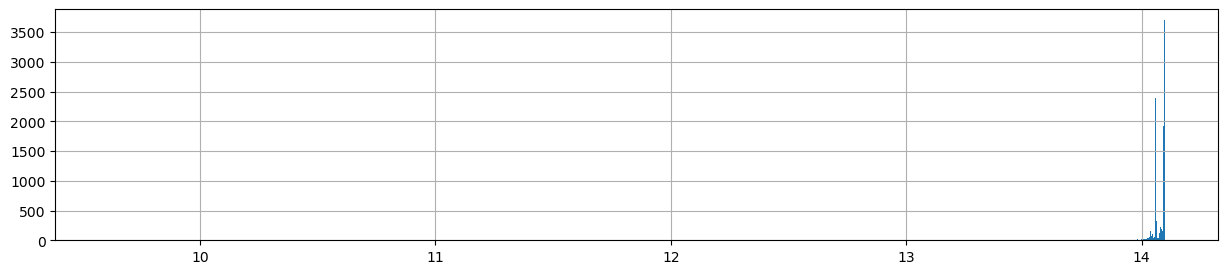

In [7]:
import matplotlib.pyplot as plt
MAS00205.BCM_ebs_U_BATT.hist(bins=1000, figsize=(15,3))
plt.show()

In [8]:
MAS00205_copy = MAS00205.copy()

MAS00205_copy['date'] = pd.to_datetime(MAS00205_copy["collect_ts"], unit='ms')

MAS00205_copy = MAS00205_copy.set_index("date")
MAS00205_copy

,vin,collect_ts,uuid,model_name,series_code,msg_create_time,vcu_VehicleMode,vcu_vehicleSpeed,VCU_VehicleSpeedValid,vcu_state,...,DCDC_MaxPwrTime,vcu_dcdc_enable,vcu_dcdc_voltageReq,DCDC_MCU_HVIL_Warning,DCDC_BMS_HVIL_Warning,DCDC_HV_InterlockStatus1,DCDC_HV_InterlockStatus,dcdc_systemStatus,dcdc_deratingStatus,dcdc_realTemperature
date,,,,,,,,,,,,,,,,,,,,,
2023-04-17 06:55:43.810,LM8F7D890MAS00205,1681714543810,LM8F7D890MAS00205#1681714546218#4524,B24DRF8JP2L01,SERES-X1,1681714545686,NaN,NaN,NaN,NaN,...,2559.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,26.0
2023-04-17 06:55:53.810,LM8F7D890MAS00205,1681714553810,LM8F7D890MAS00205#1681714555739#3253,B24DRF8JP2L01,SERES-X1,1681714555688,NaN,NaN,NaN,NaN,...,2559.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,26.0
2023-04-17 06:56:03.810,LM8F7D890MAS00205,1681714563810,LM8F7D890MAS00205#1681714566215#1159,B24DRF8JP2L01,SERES-X1,1681714565677,NaN,NaN,NaN,NaN,...,2559.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,26.0
2023-04-17 06:56:13.810,LM8F7D890MAS00205,1681714573810,LM8F7D890MAS00205#1681714576305#7412,B24DRF8JP2L01,SERES-X1,1681714575677,NaN,NaN,NaN,NaN,...,2559.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,26.0
2023-04-17 06:56:23.810,LM8F7D890MAS00205,1681714583810,LM8F7D890MAS00205#1681714586274#9373,B24DRF8JP2L01,SERES-X1,1681714585706,NaN,NaN,NaN,NaN,...,2559.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,26.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-04-18 11:41:17.141,LM8F7D890MAS00205,1681818077141,LM8F7D890MAS00205#1681818078276#1295,B24DRF8JP2L01,SERES-X1,1681818077671,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,30.0
2023-04-18 11:41:27.141,LM8F7D890MAS00205,1681818087141,LM8F7D890MAS00205#1681818088182#1425,B24DRF8JP2L01,SERES-X1,1681818087671,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,30.0
2023-04-18 11:41:37.141,LM8F7D890MAS00205,1681818097141,LM8F7D890MAS00205#1681818098190#5260,B24DRF8JP2L01,SERES-X1,1681818097679,NaN,NaN,NaN,NaN,...,4095.0,NaN,NaN,0.0,0.0,0.0,0.0,2.0,0.0,30.0


In [9]:
MAS00205_copy.loc[:, ["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]]

,BCM_ebs_U_BATT,dcdc_realOutputVoltage
date,,
2023-04-17 06:55:43.810,13.961914,14.0
2023-04-17 06:55:53.810,13.962891,14.0
2023-04-17 06:56:03.810,13.964844,14.0
2023-04-17 06:56:13.810,13.964844,14.0
2023-04-17 06:56:23.810,13.981445,14.0
...,...,...
2023-04-18 11:41:17.141,14.075195,14.1
2023-04-18 11:41:27.141,14.093750,14.0
2023-04-18 11:41:37.141,14.091797,14.0


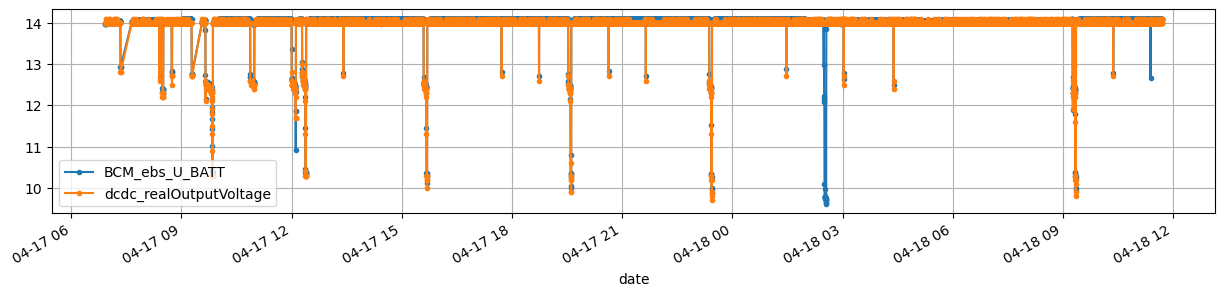

In [10]:
import matplotlib.pyplot as plt

MAS00205_copy[["BCM_ebs_U_BATT", "dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

# extra code – saves the figure for the book
plt.show()

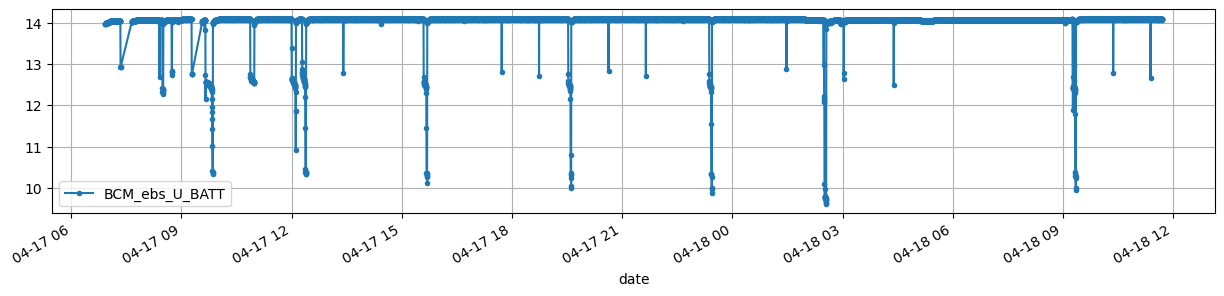

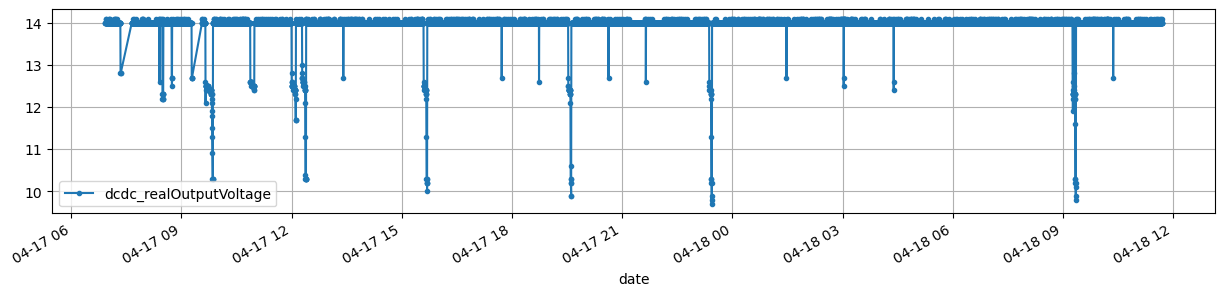

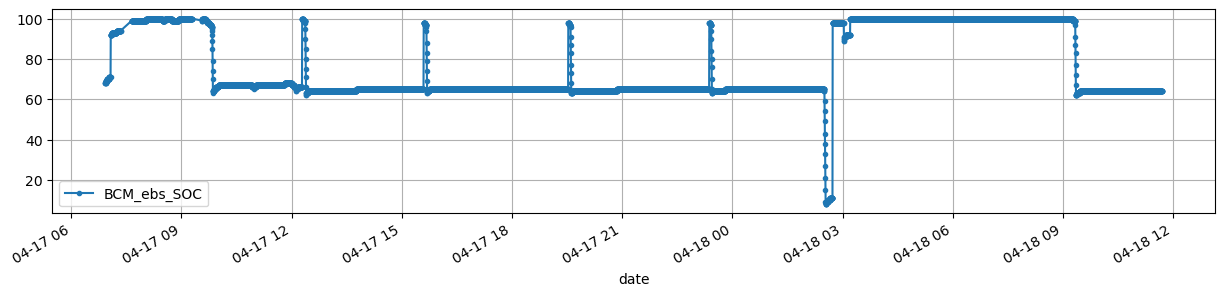

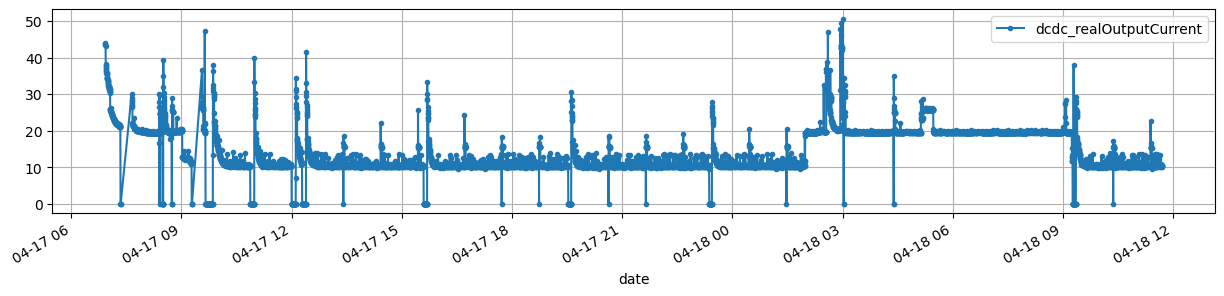

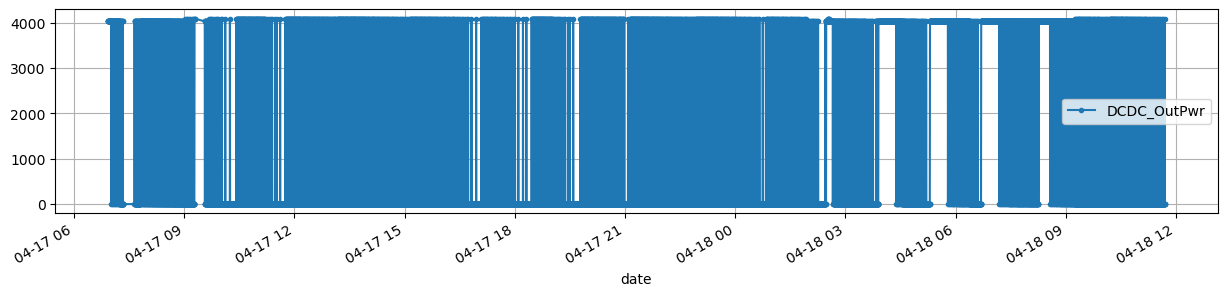

In [11]:
import matplotlib.pyplot as plt

MAS00205_copy[["BCM_ebs_U_BATT"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00205_copy[["dcdc_realOutputVoltage"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00205_copy[["BCM_ebs_SOC"]].plot(grid=True, marker=".", figsize=(15, 3))

MAS00205_copy[["dcdc_realOutputCurrent"]].plot(grid=True, marker=".", figsize=(15, 3))
MAS00205_copy[["DCDC_OutPwr"]].plot(grid=True, marker=".", figsize=(15, 3))
# extra code – saves the figure for the book
plt.show()